# 1. Import LIbraries

In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
from fastf1 import plotting
from fastf1 import utils
from matplotlib import animation
import numpy as np
import pandas as pd
import collections

## Notebook settings

In [2]:
# for interactive graph
%matplotlib notebook
%matplotlib notebook

In [3]:
# DataFrame settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# fastf1 plotting settings
plotting.setup_mpl()
# enable the cache
ff1.Cache.enable_cache('cache')

# 2. Import Data

In [5]:
# Qualifying data
quali = ff1.get_session(2022,'Bahrain','Q')

In [6]:
# Lap data
laps = quali.load_laps(with_telemetry = True)

core           INFO 	Loading laps for Bahrain Grand Prix - Qualifying [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['14', '1', '77', '10', '20', '55', '22', '24', '47', '31', '4', '18', '11', '27', '44', '3', '16', '6', '63', '23']


## Team ferrari - Leclarc

In [9]:
# Leclarc fastest lap
lec_q          = laps.pick_driver('LEC').pick_fastest()

# # Add telemetry data
lec_fastlap_q  = lec_q.get_telemetry().add_distance().reset_index(drop=True)
lec_fastlap_q

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
0,2022-03-19 15:58:18.339,0 days 01:13:17.410000,,591.047778,0 days 00:00:00,10514,292,7,100,0,12,interpolation,0.000006,OnTrack,-380,1280,-159,0.000000
1,2022-03-19 15:58:18.423,0 days 01:13:17.494000,,591.047778,0 days 00:00:00.084000,10502,293,7,100,0,12,pos,0.001283,OnTrack,-377,1350,-159,6.836667
2,2022-03-19 15:58:18.491,0 days 01:13:17.562000,,591.047778,0 days 00:00:00.152000,10478,294,8,100,0,12,car,0.002319,OnTrack,-373,1413,-158,12.390000
3,2022-03-19 15:58:18.723,0 days 01:13:17.794000,,591.047778,0 days 00:00:00.384000,10519,295,8,100,0,12,pos,0.005868,OnTrack,-362,1661,-158,31.401111
4,2022-03-19 15:58:18.731,0 days 01:13:17.802000,77,591.047778,0 days 00:00:00.392000,10560,296,8,100,0,12,car,0.005991,OnTrack,-361,1669,-157,32.058889
5,2022-03-19 15:58:19.123,0 days 01:13:18.194000,77,585.270000,0 days 00:00:00.784000,10628,297,8,100,0,12,pos,0.012048,OnTrack,-346,2026,-159,64.398889
6,2022-03-19 15:58:19.131,0 days 01:13:18.202000,77,579.492222,0 days 00:00:00.792000,10696,299,8,100,0,12,car,0.012172,OnTrack,-345,2030,-159,65.063333
7,2022-03-19 15:58:19.291,0 days 01:13:18.362000,77,574.292222,0 days 00:00:00.952000,10696,300,8,100,0,12,car,0.014653,OnTrack,-343,2092,-159,78.396667
8,2022-03-19 15:58:19.363,0 days 01:13:18.434000,77,567.203333,0 days 00:00:01.024000,10734,301,8,100,0,12,pos,0.015775,OnTrack,-342,2126,-159,84.416667
9,2022-03-19 15:58:19.663,0 days 01:13:18.734000,77,560.114444,0 days 00:00:01.324000,10773,302,8,100,0,12,pos,0.020476,OnTrack,-332,2377,-159,109.583333


## Team redbull - Perez

In [10]:
# Leclarc fastest lap
ver_q          = laps.pick_driver('VER').pick_fastest()

# # Add telemetry data
ver_fastlap_q  = ver_q.get_telemetry().add_distance().reset_index(drop=True)
ver_fastlap_q

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
0,2022-03-19 15:58:45.862,0 days 01:13:44.933000,,1240.833333,0 days 00:00:00,10911,293,7,100,0,12,interpolation,0.000058,OnTrack,-380,1266,-159,0.000000
1,2022-03-19 15:58:45.931,0 days 01:13:45.002000,,1240.833333,0 days 00:00:00.069000,10693,294,7,100,0,12,car,0.001110,OnTrack,-378,1325,-159,5.635000
2,2022-03-19 15:58:45.963,0 days 01:13:45.034000,,1240.833333,0 days 00:00:00.101000,10583,294,7,100,0,12,pos,0.001599,OnTrack,-377,1358,-159,8.248333
3,2022-03-19 15:58:46.131,0 days 01:13:45.202000,55,1240.833333,0 days 00:00:00.269000,10474,295,8,100,0,12,car,0.004165,OnTrack,-365,1580,-158,22.015000
4,2022-03-19 15:58:46.243,0 days 01:13:45.314000,55,1240.811111,0 days 00:00:00.381000,10552,295,8,100,0,12,pos,0.005880,OnTrack,-360,1702,-159,31.192778
5,2022-03-19 15:58:46.291,0 days 01:13:45.362000,55,1240.788889,0 days 00:00:00.429000,10630,296,8,100,0,12,car,0.006617,OnTrack,-358,1733,-159,35.139444
6,2022-03-19 15:58:46.491,0 days 01:13:45.562000,55,1240.733333,0 days 00:00:00.629000,10727,298,8,100,0,12,car,0.009702,OnTrack,-356,1795,-159,51.695000
7,2022-03-19 15:58:46.503,0 days 01:13:45.574000,55,1240.666667,0 days 00:00:00.641000,10744,299,8,100,0,12,pos,0.009888,OnTrack,-356,1801,-159,52.691667
8,2022-03-19 15:58:46.731,0 days 01:13:45.802000,55,1240.600000,0 days 00:00:00.869000,10761,301,8,100,0,12,car,0.013442,OnTrack,-347,1991,-158,71.755000
9,2022-03-19 15:58:46.824,0 days 01:13:45.895000,55,1240.570370,0 days 00:00:00.962000,10771,301,8,100,0,12,pos,0.014894,OnTrack,-344,2076,-159,79.530833


## combining both df into one along axis 1

In [12]:
ver_col = ['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance']

In [13]:
new_col = []
for i in ver_col:
    i = i+'_v'
    new_col.append(i)
new_col

['Date_v',
 'SessionTime_v',
 'DriverAhead_v',
 'DistanceToDriverAhead_v',
 'Time_v',
 'RPM_v',
 'Speed_v',
 'nGear_v',
 'Throttle_v',
 'Brake_v',
 'DRS_v',
 'Source_v',
 'RelativeDistance_v',
 'Status_v',
 'X_v',
 'Y_v',
 'Z_v',
 'Distance_v']

In [14]:
ver_fastlap_q.columns = new_col

In [15]:
df1= pd.concat([ver_fastlap_q,lec_fastlap_q],axis = 1)
df1

,Date_v,SessionTime_v,DriverAhead_v,DistanceToDriverAhead_v,Time_v,RPM_v,Speed_v,nGear_v,Throttle_v,Brake_v,DRS_v,Source_v,RelativeDistance_v,Status_v,X_v,Y_v,Z_v,Distance_v,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
0,2022-03-19 15:58:45.862,0 days 01:13:44.933000,,1240.833333,0 days 00:00:00,10911,293,7,100,0,12,interpolation,0.000058,OnTrack,-380,1266,-159,0.000000,2022-03-19 15:58:18.339,0 days 01:13:17.410000,,591.047778,0 days 00:00:00,10514.0,292.0,7.0,100.0,0.0,12.0,interpolation,0.000006,OnTrack,-380.0,1280.0,-159.0,0.000000
1,2022-03-19 15:58:45.931,0 days 01:13:45.002000,,1240.833333,0 days 00:00:00.069000,10693,294,7,100,0,12,car,0.001110,OnTrack,-378,1325,-159,5.635000,2022-03-19 15:58:18.423,0 days 01:13:17.494000,,591.047778,0 days 00:00:00.084000,10502.0,293.0,7.0,100.0,0.0,12.0,pos,0.001283,OnTrack,-377.0,1350.0,-159.0,6.836667
2,2022-03-19 15:58:45.963,0 days 01:13:45.034000,,1240.833333,0 days 00:00:00.101000,10583,294,7,100,0,12,pos,0.001599,OnTrack,-377,1358,-159,8.248333,2022-03-19 15:58:18.491,0 days 01:13:17.562000,,591.047778,0 days 00:00:00.152000,10478.0,294.0,8.0,100.0,0.0,12.0,car,0.002319,OnTrack,-373.0,1413.0,-158.0,12.390000
3,2022-03-19 15:58:46.131,0 days 01:13:45.202000,55,1240.833333,0 days 00:00:00.269000,10474,295,8,100,0,12,car,0.004165,OnTrack,-365,1580,-158,22.015000,2022-03-19 15:58:18.723,0 days 01:13:17.794000,,591.047778,0 days 00:00:00.384000,10519.0,295.0,8.0,100.0,0.0,12.0,pos,0.005868,OnTrack,-362.0,1661.0,-158.0,31.401111
4,2022-03-19 15:58:46.243,0 days 01:13:45.314000,55,1240.811111,0 days 00:00:00.381000,10552,295,8,100,0,12,pos,0.005880,OnTrack,-360,1702,-159,31.192778,2022-03-19 15:58:18.731,0 days 01:13:17.802000,77,591.047778,0 days 00:00:00.392000,10560.0,296.0,8.0,100.0,0.0,12.0,car,0.005991,OnTrack,-361.0,1669.0,-157.0,32.058889
5,2022-03-19 15:58:46.291,0 days 01:13:45.362000,55,1240.788889,0 days 00:00:00.429000,10630,296,8,100,0,12,car,0.006617,OnTrack,-358,1733,-159,35.139444,2022-03-19 15:58:19.123,0 days 01:13:18.194000,77,585.270000,0 days 00:00:00.784000,10628.0,297.0,8.0,100.0,0.0,12.0,pos,0.012048,OnTrack,-346.0,2026.0,-159.0,64.398889
6,2022-03-19 15:58:46.491,0 days 01:13:45.562000,55,1240.733333,0 days 00:00:00.629000,10727,298,8,100,0,12,car,0.009702,OnTrack,-356,1795,-159,51.695000,2022-03-19 15:58:19.131,0 days 01:13:18.202000,77,579.492222,0 days 00:00:00.792000,10696.0,299.0,8.0,100.0,0.0,12.0,car,0.012172,OnTrack,-345.0,2030.0,-159.0,65.063333
7,2022-03-19 15:58:46.503,0 days 01:13:45.574000,55,1240.666667,0 days 00:00:00.641000,10744,299,8,100,0,12,pos,0.009888,OnTrack,-356,1801,-159,52.691667,2022-03-19 15:58:19.291,0 days 01:13:18.362000,77,574.292222,0 days 00:00:00.952000,10696.0,300.0,8.0,100.0,0.0,12.0,car,0.014653,OnTrack,-343.0,2092.0,-159.0,78.396667
8,2022-03-19 15:58:46.731,0 days 01:13:45.802000,55,1240.600000,0 days 00:00:00.869000,10761,301,8,100,0,12,car,0.013442,OnTrack,-347,1991,-158,71.755000,2022-03-19 15:58:19.363,0 days 01:13:18.434000,77,567.203333,0 days 00:00:01.024000,10734.0,301.0,8.0,100.0,0.0,12.0,pos,0.015775,OnTrack,-342.0,2126.0,-159.0,84.416667
9,2022-03-19 15:58:46.824,0 days 01:13:45.895000,55,1240.570370,0 days 00:00:00.962000,10771,301,8,100,0,12,pos,0.014894,OnTrack,-344,2076,-159,79.530833,2022-03-19 15:58:19.663,0 days 01:13:18.734000,77,560.114444,0 days 00:00:01.324000,10773.0,302.0,8.0,100.0,0.0,12.0,pos,0.020476,OnTrack,-332.0,2377.0,-159.0,109.583333


In [146]:
# delta_time, lec_ref_tel, ver_compare_tel = utils.delta_time(lec_q, ver_q)
# #ham is reference, lec is compared
# ver_compare_tel.columns

# ver_col = ['Date', 'SessionTime', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake',
#        'DRS', 'Source', 'Time', 'Distance']

# new_ver_col = []

# for i in ver_col:
#     i = i+'_v'
#     new_ver_col.append(i)

# ver_compare_tel.columns = new_ver_col

# df_combine = pd.concat([lec_ref_tel,ver_compare_tel],axis=1)

# Color correction Function for bar plots

In [16]:
# plot gradient color for bar plots 
def gradientbars_sliced(bars,bar_color='Reds'):
    ax = bars[0].axes
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.linspace(y, y + h, 256).reshape(256, 1)
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
                  vmin=ymin, vmax=ymax, cmap=bar_color)
    ax.axis([xmin, xmax, ymin, ymax])

# 3. Plottting

<IPython.core.display.Javascript object>


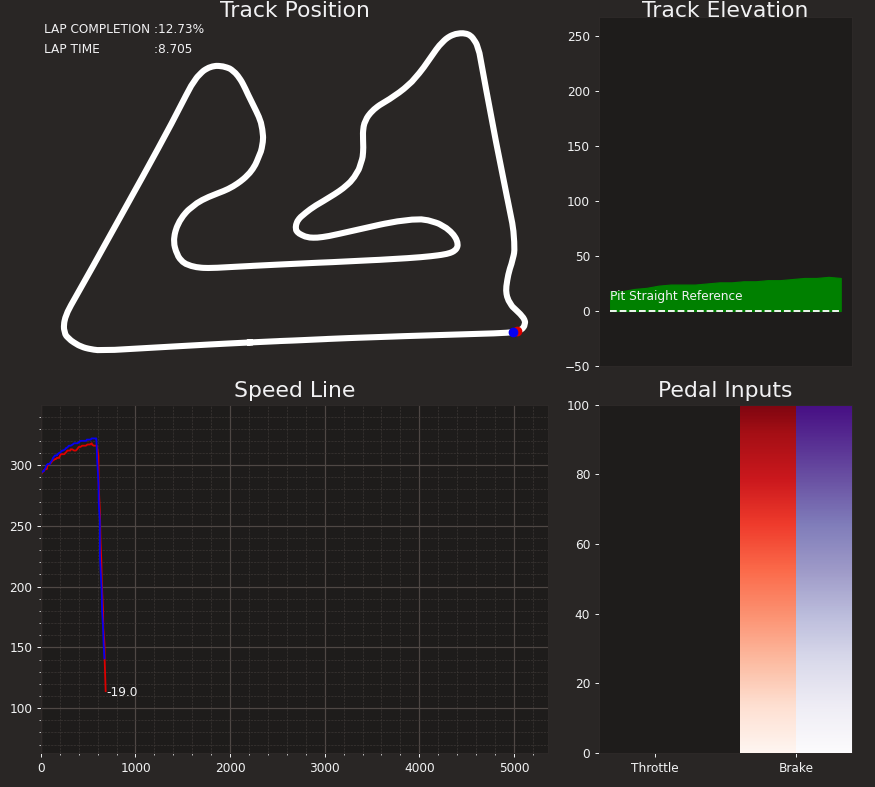

In [27]:
df = df1


# x and y coordinates
x1 = df['Y']
y1 = df['X']

x2 = df['Y_v']
y2 = df['X_v']

# Distance and speed
d  = df['Distance']
s  = df['Speed']

d2 = df['Distance_v']
s2 = df['Speed_v']

# Pedal inputs
gas_pedal_l   = df['Throttle']
brake_pedal_l = df['Brake']

gas_pedal_v   = df['Throttle_v']
brake_pedal_v = df['Brake_v']

# Current gear engaged
g_l = df['nGear']
g_v = df['nGear_v']

driver_col1 = plotting.team_color(lec_q['Team'])
driver_col2 = plotting.team_color(ver_q['Team'])


dist_cov  = df['RelativeDistance'].apply(lambda x: round(x*100,2))

# Initiating plotting
fig1, ax1 = plt.subplots(2,2,figsize=(10,9),gridspec_kw={'width_ratios': [4, 2]}) #

# text data ax1[0] of time stamp
time_lap  = df['Time'].astype('string')
time_lap  = time_lap.str.lstrip('0 days 00:')
time_lap  = time_lap.str.rstrip('00')

# elevation initiating ax1[1] 
elev_len  = 20            # no of points for plot
z_values  = df['Z']       # elevation data
z_values  = z_values.apply(lambda i: i-z_values[0]) # reducing the z values  
elevation = collections.deque(np.zeros(elev_len))   # deque from collection(kind of list element)



# text data gear shift 
shift = ''
gear_up_down = []
for i,j in zip(g_l,g_l[1:]):
    if   i < j:
        shift = f'Upshift   \u2b9d'
        gear_up_down.append(shift)
    elif i > j:
        shift = f'Downshift \u2b9f'
        gear_up_down.append(shift)
    elif i == j:
        gear_up_down.append(shift)
gear_up_down.append(shift)



def frame(i):
    # for first plot ax1[0]
    ax1[0,0].cla()
    ax1[0,0].set_title('Track Position', fontsize = 18, y=0.96)
    ax1[0,0].axis('off')
    ax1[0,0].plot(x1, y1, linewidth = 5.0, color = 'white')
    ax1[0,0].scatter(x1[i], y1[i], color=driver_col1, linewidth = 2.0, zorder = 3)
    ax1[0,0].scatter(x2[i], y2[i], color=driver_col2, linewidth = 2.0, zorder = 3)
#     dist_cov = round(df['Distance'][i]/np.max(df['Distance'])*100,1)
    ax1[0,0].text(-4000, 7500, f'LAP COMPLETION :{dist_cov[i]}%')
    
    ax1[0,0].text(-4000, 7000, f'LAP TIME              :{time_lap[i]}')
#     
#     ax1[0,0].set_xlim( np.min(a), np.max(a) ) # fix the x axis
#     ax1[0,0].set_ylim( np.min(b), np.max(b) ) # fix the y axis
    
    # for second plot ax1[1]
    # get data
    elevation.popleft()
    elevation.append(z_values[i])
    
    # clear axis
    ax1[0,1].cla()
    
    # plot elevation
    # reference line
    ax1[0,1].hlines( y = z_values[0], xmin = 0, xmax = elev_len-1, linewidth = 1.5, linestyle = '--', colors = 'white')
    ax1[0,1].text(0, 10, f'Pit Straight Reference') # add text for the reference line
    
    # area plot 
    ax1[0,1].fill_between(range(0, elev_len), elevation, color = 'green')
    ax1[0,1].set_title('Track Elevation', fontsize = 18, y = 0.96)
    ax1[0,1].set_ylim(np.min(z_values)-50, np.max(z_values)+100) # broadening the y-axis
    ax1[0,1].get_xaxis().set_visible(False)                     # removing x-axis
    
    # bottom second
#     ax1[1,1].cla() # clear the previous image
#     bar1 = ax1[1,1].bar([1,2], [gas_pedal[i], brake_pedal[i]], width=0.4)
#     ax1[1,1].set_ylim(np.min(gas_pedal_l), np.max(gas_pedal_l))
#     ax1[1,1].set_xlim(0.5,2.5)
#     ax1[1,1].set_xticks([1,2])
#     ax1[1,1].set_xticklabels(['Throttle', 'Brake'])
#     ax1[1,1].set_title('Pedal Inputs', fontsize=18, y =0.98)
#     gradientbars_sliced(bar1)
    

    # bottom first
    ax1[1,0].cla()
    ax1[1,0].set_title('Speed Line', fontsize = 18, y =0.98) #
    ax1[1,0].minorticks_on()
#     ax[1].grid()
    grid = getattr(ax1[1,0], 'grid')
    grid(b=True, which='major', color='#4f4845', linestyle='-', linewidth=1)
    grid(b=True, which='minor', color='#3f3a38', linestyle='--', linewidth=0.5)
    
    ax1[1,0].plot(d[:i],   s[:i], color = driver_col1)   #
    ax1[1,0].plot(d2[:i], s2[:i], color = driver_col2)   #
    
    ax1[1,0].set_xlim(np.min(d), np.max(d)) # fix the x axis
    ax1[1,0].set_ylim(np.min(s)*0.9, np.max(s)*1.1) # fix the y axis
    ax1[1,0].text(d[i], s[i], s=f"{s[i]-s2[i]}")
#     ax1[1,0].text(4000, 340, s=f"Current gear - {g_l[i]}")
#     ax1[1,0].text(4000, 330, s=f"{gear_up_down[i]}")

    ax1[1,1].cla()
    bar_t1 = ax1[1,1].bar([.2,1.2],[gas_pedal_l[i],brake_pedal_l[i]],width=.4)
    gradientbars_sliced(bar_t1)
    
    bar_t2 = ax1[1,1].bar([.6,1.6],[gas_pedal_v[i],brake_pedal_v[i]],width=.4)
    gradientbars_sliced(bar_t2,'Purples')
    ax1[1,1].set_ylim(np.min(gas_pedal_l), np.max(gas_pedal_l))
    ax1[1,1].set_xlim(0, 1.8)
    ax1[1,1].set_xticks([.4,1.4])
    ax1[1,1].set_xticklabels(['Throttle', 'Brake'])
    ax1[1,1].set_title('Pedal Inputs', fontsize=18, y =0.98)
    
    
    
    
    
anim1 = animation.FuncAnimation(fig1, frame, frames = len(x1)+1, interval = 1 ,repeat=False)

plt.tight_layout()
plt.show()

# writergif = animation.PillowWriter(fps=30) 
# anim1.save('test4.gif', writer=writergif)